<a href="https://colab.research.google.com/github/gauthamceee/Banking-Business-Case-Analysis/blob/main/Banking_Business_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import openpyxl

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/My Drive/Banking_Case_Data.xlsx"

# Read multiple sheets
sheet1 = pd.read_excel(file_path, sheet_name="Transaction Data")
sheet2 = pd.read_excel(file_path, sheet_name="Customer Demographics")

In [5]:
# Display the first few rows
print(sheet1.head())
print(sheet2.head())

   Sno  Customer_number Insurance balance housing loan  contact  duration  \
0    0             1001        no    2143     yes   no      NaN     261.0   
1    1             1002        no      29     yes   no  unknown     151.0   
2    2             1003        no       2     yes  yes  unknown      76.0   
3    3             1004        no    1506     yes   no  unknown      92.0   
4    4             1005        no       1      no   no  unknown     198.0   

   campaign  last_contact_day  previous poutcome Term Deposit  Count_Txn  
0         1                 2         0  unknown           no      351.0  
1         1                 2         0  unknown           no      326.0  
2         1                 2         0      NaN           no      422.0  
3         1                 2         0  unknown           no      113.0  
4         1                 2         0  unknown           no      342.0  
   Customer_number  age           job  marital  education Annual Income Gender
0       

In [6]:
#Merge two sheets using customer no
data = pd.merge(sheet1, sheet2, on="Customer_number",how="outer")

In [7]:
#Display the first 10 rows
data.head(10)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368,M
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0,33,entrepreneur,married,NaN,4851383,F
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
5,5,1006,no,231,yes,no,unknown,139.0,1,2,0,unknown,no,490.0,35,management,married,ter tiary,3960603,M
6,6,1007,no,447,yes,yes,unknown,217.0,1,2,0,unknown,no,411.0,28,management,single,ter tiary,2383284,M
7,7,1008,yes,2,yes,no,NaN,380.0,1,2,0,pending,no,108.0,42,entrepreneur,divorced,tertiary,NaN,F
8,8,1009,no,121,yes,no,unknown,50.0,1,2,0,pending,no,328.0,58,retired,married,primary,1122246,F
9,9,1010,no,593,yes,no,unknown,55.0,1,2,0,pending,no,124.0,43,technician,single,secondary,1111232,M


In [8]:
#Check missing values
data.isnull().sum()

,0
Sno,0
Customer_number,0
Insurance,0
balance,55
housing,0
loan,8
contact,43
duration,39
campaign,0
last_contact_day,0


In [9]:
# Handle missing values
data.replace('unknown', 'missing', inplace=True)

# Fix 'Annual Income' column by replacing '\' with 'nan'
data['Annual Income'].replace('\\', 'NaN', inplace=True)
data=data.fillna(0)

# Convert 'Annual Income' to numeric, replacing errors with NaN
data['Annual Income'] = pd.to_numeric(data['Annual Income'], errors='coerce')

data.head(10)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,0,261.0,1,2,0,missing,no,351.0,58,management,married,tertiary,839368.0,M
1,1,1002,no,29,yes,no,missing,151.0,1,2,0,missing,no,326.0,44,technician,single,secondary,1452858.0,M
2,2,1003,no,2,yes,yes,missing,76.0,1,2,0,0,no,422.0,33,entrepreneur,married,0,4851383.0,F
3,3,1004,no,1506,yes,no,missing,92.0,1,2,0,missing,no,113.0,47,blue collar,married,missing,3207754.0,F
4,4,1005,no,1,no,no,missing,198.0,1,2,0,missing,no,342.0,33,missing,single,missing,2562322.0,M
5,5,1006,no,231,yes,no,missing,139.0,1,2,0,missing,no,490.0,35,management,married,ter tiary,3960603.0,M
6,6,1007,no,447,yes,yes,missing,217.0,1,2,0,missing,no,411.0,28,management,single,ter tiary,2383284.0,M
7,7,1008,yes,2,yes,no,0,380.0,1,2,0,pending,no,108.0,42,entrepreneur,divorced,tertiary,0.0,F
8,8,1009,no,121,yes,no,missing,50.0,1,2,0,pending,no,328.0,58,retired,married,primary,1122246.0,F
9,9,1010,no,593,yes,no,missing,55.0,1,2,0,pending,no,124.0,43,technician,single,secondary,1111232.0,M


In [10]:
# Fix typos
data['education'].replace('ter tiary', 'tertiary', inplace=True)
data['marital'].replace('maried', 'married', inplace=True)

In [11]:
data.fillna(0, inplace=True)

In [12]:
data = data[~data['balance'].isin(["??", "??//", "????","//??","???"])]
data['balance'] = data['balance'].astype(float)

In [13]:
#check missing value
data.isnull().sum()

,0
Sno,0
Customer_number,0
Insurance,0
balance,0
housing,0
loan,0
contact,0
duration,0
campaign,0
last_contact_day,0


In [14]:
#total row and column
data.shape

(45185, 20)

In [15]:
data.head(20)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143.0,yes,no,0,261.0,1,2,0,missing,no,351.0,58,management,married,tertiary,839368.0,M
1,1,1002,no,29.0,yes,no,missing,151.0,1,2,0,missing,no,326.0,44,technician,single,secondary,1452858.0,M
2,2,1003,no,2.0,yes,yes,missing,76.0,1,2,0,0,no,422.0,33,entrepreneur,married,0,4851383.0,F
3,3,1004,no,1506.0,yes,no,missing,92.0,1,2,0,missing,no,113.0,47,blue collar,married,missing,3207754.0,F
4,4,1005,no,1.0,no,no,missing,198.0,1,2,0,missing,no,342.0,33,missing,single,missing,2562322.0,M
5,5,1006,no,231.0,yes,no,missing,139.0,1,2,0,missing,no,490.0,35,management,married,tertiary,3960603.0,M
6,6,1007,no,447.0,yes,yes,missing,217.0,1,2,0,missing,no,411.0,28,management,single,tertiary,2383284.0,M
7,7,1008,yes,2.0,yes,no,0,380.0,1,2,0,pending,no,108.0,42,entrepreneur,divorced,tertiary,0.0,F
8,8,1009,no,121.0,yes,no,missing,50.0,1,2,0,pending,no,328.0,58,retired,married,primary,1122246.0,F
9,9,1010,no,593.0,yes,no,missing,55.0,1,2,0,pending,no,124.0,43,technician,single,secondary,1111232.0,M


In [16]:
#Datatypes
data.dtypes

,0
Sno,int64
Customer_number,int64
Insurance,object
balance,float64
housing,object
loan,object
contact,object
duration,float64
campaign,int64
last_contact_day,int64


In [17]:
# Filter rows with no 'Annual Income' (NaN or 0)
no_income_customers = data[ data['Annual Income'].isna() | (data['Annual Income'] == 0) ]

# Display the result (rows with no Annual Income)
print(no_income_customers)

       Sno  Customer_number Insurance  balance housing loan  contact  \
7        7             1008       yes      2.0     yes   no        0   
14      14             1015        no    162.0     yes   no  missing   
23      23             1024        no     50.0     yes   no        0   
4993  4993             5994        no    170.0     yes  yes  missing   
5040  5040             6041        no    722.0     yes   no  missing   
5335  5335             6336        no   2549.0     yes   no  missing   
5350  5350             6351        no    253.0     yes   no  missing   
5412  5412             6413        no    205.0     yes   no        0   
5513  5513             6514        no   1049.0     yes   no        0   
5565  5565             6566        no     97.0     yes   no        0   
5636  5636             6637        no   1495.0     yes  yes  missing   
5638  5638             6639        no   3316.0     yes   no  missing   
5643  5643             6644        no     41.0     yes  yes  mis

In [18]:
# Feature Engineering
data['income_bracket'] = pd.cut(data['Annual Income'], bins=[0, 100000, 500000, np.inf], labels=['low', 'medium', 'high'])
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 60, np.inf], labels=['18-25', '26-35', '36-45', '46-60', '60+'])

In [19]:
#object to int first check any string is present
data.select_dtypes(include=['object']).columns
#change term deposit to yes no to 0 and 1
data['Term Deposit'] = data['Term Deposit'].map({'yes': 1, 'no': 0})

In [20]:
unique_values = data['balance'].unique()
for value in unique_values:
    if isinstance(value, str):  # Check if the value is a string
        if any(not c.isalnum() and not c.isspace() for c in value):
            print(value)

In [21]:
# Convert all relevant columns to string type
for col in ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'marital', 'job', 'education', 'Gender', 'income_bracket', 'age_group']:
    data[col] = data[col].astype(str)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'marital', 'job', 'education', 'Gender', 'income_bracket', 'age_group']:
    data[col] = le.fit_transform(data[col])

print(data)

         Sno  Customer_number  Insurance  balance  housing  loan  contact  \
0          0             1001          0   2143.0        1     1        0   
1          1             1002          0     29.0        1     1        5   
2          2             1003          0      2.0        1     2        5   
3          3             1004          0   1506.0        1     1        5   
4          4             1005          0      1.0        0     1        5   
...      ...              ...        ...      ...      ...   ...      ...   
45206  45206            46207          0    825.0        0     1        4   
45207  45207            46208          0   1729.0        0     1        4   
45208  45208            46209          0   5715.0        0     1        4   
45209  45209            46210          0    668.0        0     1        6   
45210  45210            46211          0   2971.0        0     1        4   

       duration  campaign  last_contact_day  ...  Term Deposit  Count_Txn  

In [22]:
# Example: Remove outliers beyond 3 standard deviations
data = data[(np.abs(data['balance'] - data['balance'].mean()) <= (3 * data['balance'].std()))]

In [23]:
# Filter rows with no 'Annual Income' (NaN or 0)
no_income_customers = data[ data['Annual Income'].isna() | (data['Annual Income'] == 0) ]

In [24]:
# Scaling numerical columns
scaler = StandardScaler()
data[['balance', 'duration', 'Annual Income', 'Count_Txn']] = scaler.fit_transform(data[['balance', 'duration', 'Annual Income', 'Count_Txn']])

Data Analysis And Visualization

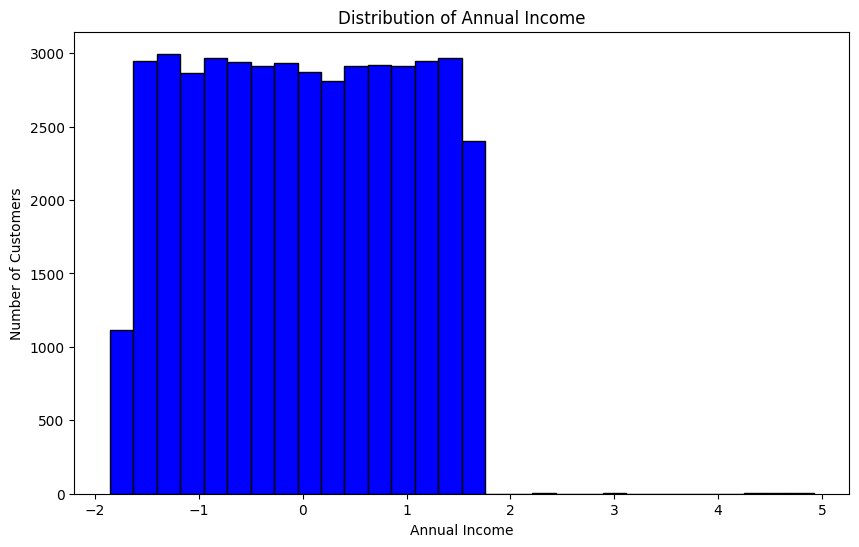

Number of customers with no Annual Income: 18


In [25]:
# 1. Income Insights:
import matplotlib.pyplot as plt

# Count of customers with no income
no_income_count = no_income_customers.shape[0]

# Plot distribution of income
plt.figure(figsize=(10, 6))
plt.hist(data['Annual Income'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.show()

# Print number of customers with no income
print(f"Number of customers with no Annual Income: {no_income_count}")

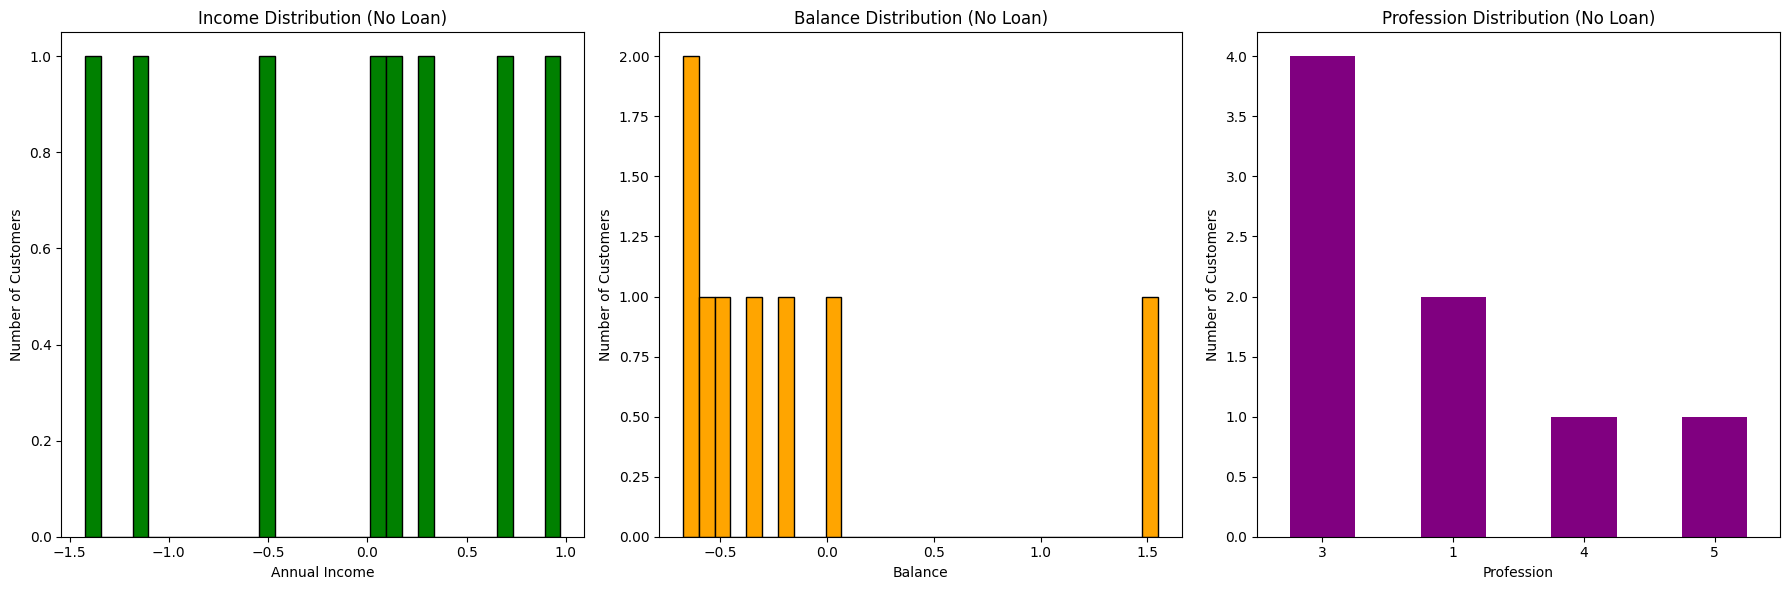

In [26]:
# Loan-less Customers Profile:
# Filter customers without any loans
no_loan_customers = data[data['loan'] == 0]

# Plot distribution of income, balance, and profession for customers without loans
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Income distribution
axes[0].hist(no_loan_customers['Annual Income'], bins=30, color='green', edgecolor='black')
axes[0].set_title('Income Distribution (No Loan)')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Number of Customers')

# Balance distribution
axes[1].hist(no_loan_customers['balance'], bins=30, color='orange', edgecolor='black')
axes[1].set_title('Balance Distribution (No Loan)')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Number of Customers')

# Profession distribution
no_loan_customers['job'].value_counts().plot(kind='bar', ax=axes[2], color='purple')
axes[2].set_title('Profession Distribution (No Loan)')
axes[2].set_xlabel('Profession')

axes[2].set_ylabel('Number of Customers')
axes[2].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

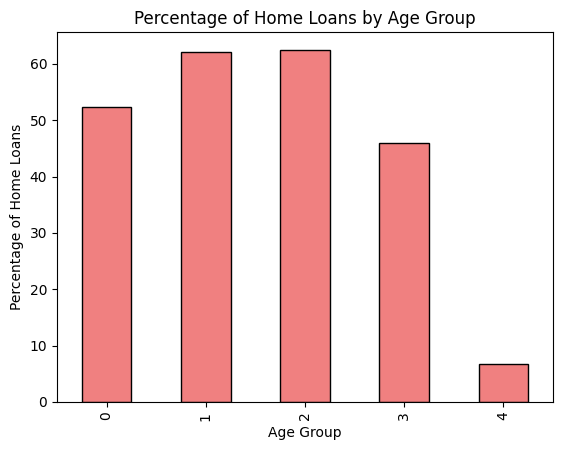

The age group with the highest percentage of home loans is: 2


In [27]:
#3. Loan and Insurance Analysis:
# Calculate the percentage of home loans in each age group
age_home_loans = data[data['housing'] == 1].groupby('age_group').size() / data.groupby('age_group').size() * 100

# Visualize the percentage of home loans by age group
age_home_loans.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.show()

# Display the age group with the highest percentage
max_age_group = age_home_loans.idxmax()
print(f"The age group with the highest percentage of home loans is: {max_age_group}")

contact
0    0.048780
1    0.000000
2    0.000000
3    0.550000
4    0.148319
5    0.040792
6    0.130700
Name: Term Deposit, dtype: float64


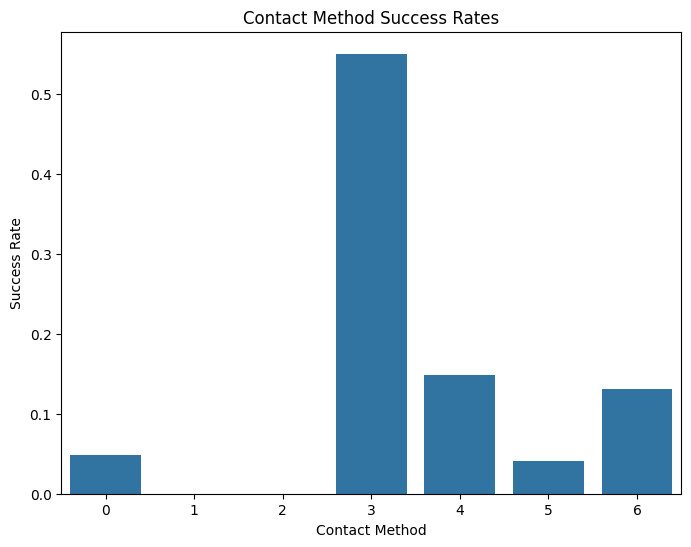

In [28]:
# 4. Communication Strategy Insights
contact_success_rates = data.groupby("contact")["Term Deposit"].mean()
print(contact_success_rates)
plt.figure(figsize=(8, 6))
sns.barplot(x=contact_success_rates.index, y=contact_success_rates.values)
plt.title("Contact Method Success Rates")
plt.xlabel("Contact Method")
plt.ylabel("Success Rate")
plt.show()

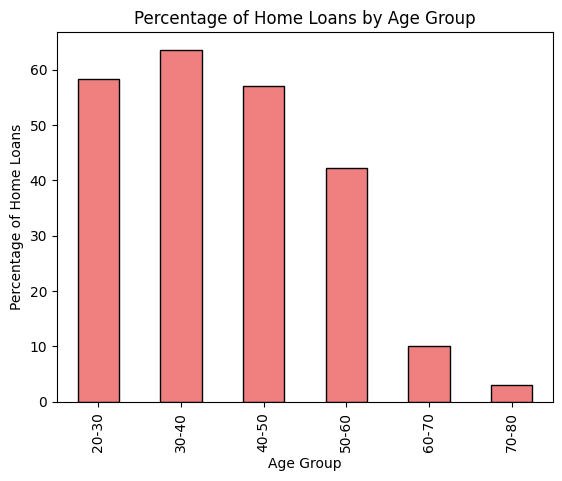

The age group with the highest percentage of home loans is: 30-40


In [29]:
# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Calculate the percentage of home loans in each age group
age_home_loans = data[data['housing'] == 1].groupby('age_group').size() / data.groupby('age_group').size() * 100

# Visualize the percentage of home loans by age group
age_home_loans.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.show()

# Display the age group with the highest percentage
max_age_group = age_home_loans.idxmax()
print(f"The age group with the highest percentage of home loans is: {max_age_group}")
# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])


<Figure size 1000x600 with 0 Axes>

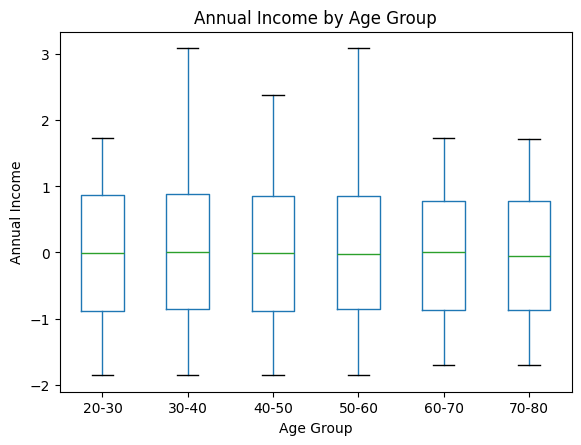

In [30]:
#6. Income and Age Relationship:
# Boxplot to visualize the relationship between income and age group
plt.figure(figsize=(10, 6))
data.boxplot(column='Annual Income', by='age_group', grid=False, showfliers=False)
plt.title('Annual Income by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.show()

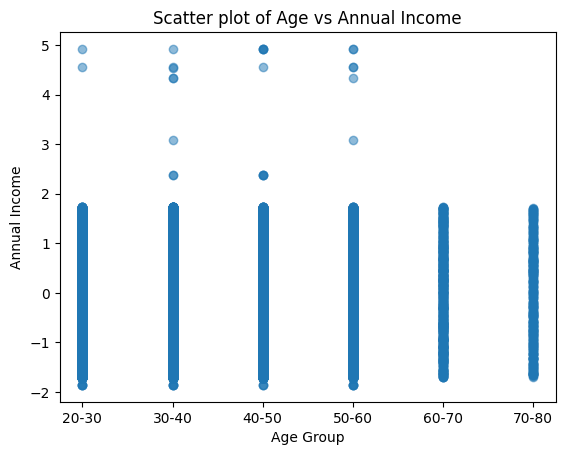

In [31]:
# Map categorical values to numerical values
age_group_map = {'20-30': 25, '30-40': 35, '40-50': 45, '50-60': 55, '60-70': 65, '70-80': 75}
data['age_group_num'] = data['age_group'].map(age_group_map)

# Scatter plot
plt.scatter(data['age_group_num'], data['Annual Income'], alpha=0.5)
plt.title('Scatter plot of Age vs Annual Income')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.xticks(list(age_group_map.values()), list(age_group_map.keys()))
plt.show()

Modeling

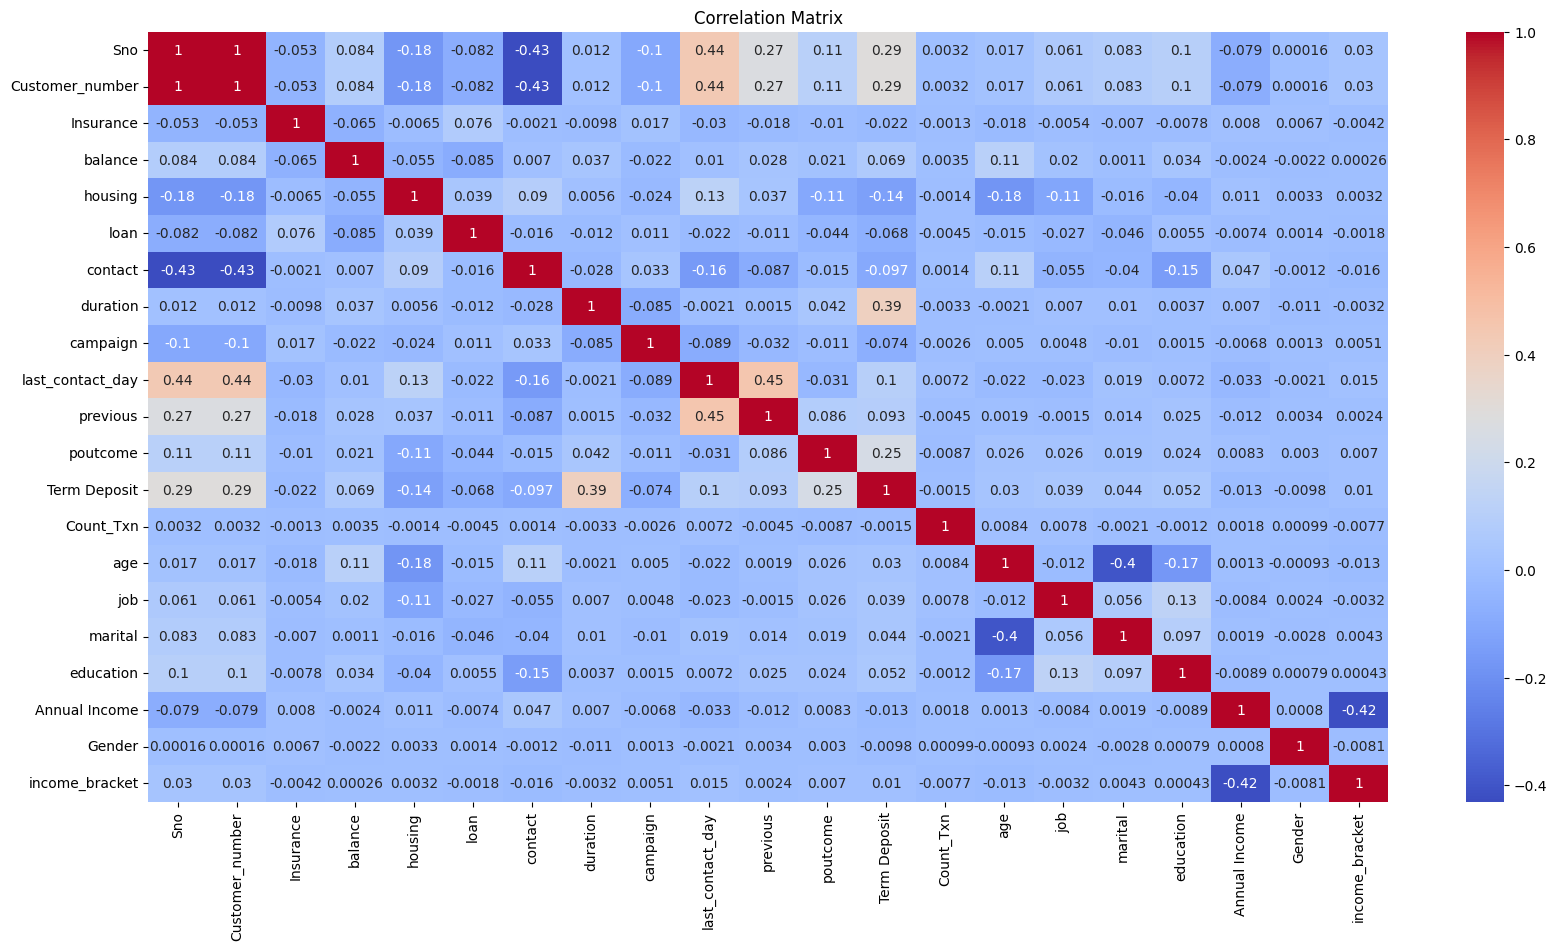

Chi-square test for job: Chi2 Stat = 829.6310552411928, p-value = 6.203988937634332e-169
Chi-square test for contact: Chi2 Stat = 1045.9076402587464, p-value = 1.050991578676708e-222
Chi-square test for education: Chi2 Stat = 232.92824069037397, p-value = 2.520627156375654e-48


In [32]:
#1. Term Deposit and Related Variables:
import seaborn as sns
from scipy.stats import chi2_contingency, chi2

# Correlation for numerical variables
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation = numerical_data.corr()

plt.figure(figsize=(20, 10))
# Create heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Chi-square test for categorical variables
# Assuming 'term_deposit' is the target variable
categorical_columns = ['job', 'contact', 'education']  # Add relevant categorical variables

for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Term Deposit'])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}: Chi2 Stat = {chi2_stat}, p-value = {p_val}")

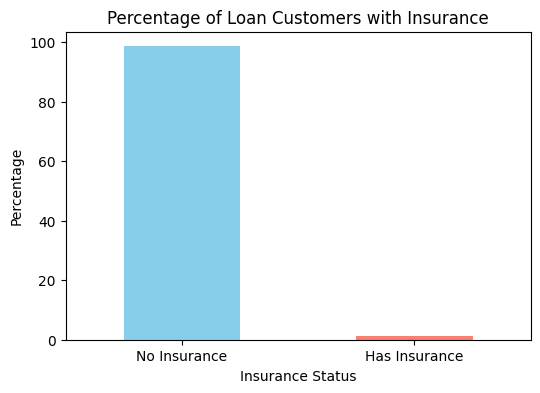

Loan customers with insurance breakdown:
Insurance
0    98.622116
1     1.377884
Name: proportion, dtype: float64


In [33]:
# Calculate percentage of customers with a loan who have taken insurance
loan_insurance = data[data['loan'] == 1]['Insurance'].value_counts(normalize=True) * 100

# Visualizing the percentage of customers with a loan who have taken insurance
plt.figure(figsize=(6, 4))
loan_insurance.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Loan Customers with Insurance')
plt.xlabel('Insurance Status')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No Insurance', 'Has Insurance'], rotation=0)
plt.show()

# Print the percentage values
print("Loan customers with insurance breakdown:")
print(loan_insurance)

In [34]:
print(data['Term Deposit'].isnull().sum())

8


In [35]:
data = data.dropna(subset=['Term Deposit'])

In [36]:
#2. Predictive Model Building:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Feature selection
X = data[['age', 'Annual Income', 'balance', 'loan']]
y = data['Term Deposit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and performance
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))


Train Accuracy: 0.9999155999437332
Test Accuracy: 0.8773489366490379
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      7863
         1.0       0.32      0.06      0.10      1024

    accuracy                           0.88      8887
   macro avg       0.60      0.52      0.52      8887
weighted avg       0.82      0.88      0.84      8887



In [37]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and performance
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))

XGBoost Test Accuracy: 0.8821874648362777


In [38]:
from sklearn.ensemble import VotingClassifier

# Combine models using VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('rf', model),
    ('xgb', xgb_model)
], voting='soft')

voting_model.fit(X_train, y_train)

# Predictions and performance
y_pred_test_voting = voting_model.predict(X_test)

# Evaluation
print("Voting Classifier Test Accuracy:", accuracy_score(y_test, y_pred_test_voting))

Voting Classifier Test Accuracy: 0.88241251265894


In [39]:
# Model Improvement with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Train final model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Final Accuracy: 0.8842128952402386
